In [2]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from sympy.solvers.ode.systems import dsolve_system

In [3]:
def eulersMethod(t_steps,differentials,init_cond):
    x=np.ndarray((2,len(t_steps)))
    # Set up initial Values
    x[0,0] = init_cond[0]
    x[1,0] = init_cond[1]
    # print("Initial Values are x_1(0) = {} and x_2(0)={}".format(x[0,0],x[1,0]))
    for ti in range(1,len(t_steps)):#From 1 to last index
        # Your Eulers Implementation
        x[0,ti] = x[0,ti-1] + t_steps[1] * differentials[0](x[0,ti-1],x[1,ti-1])
        x[1,ti] = x[1,ti-1] + t_steps[1] * differentials[1](x[0,ti-1],x[1,ti-1])

    return x

System:


Eq(Derivative(x1(t), t), x2(t))

Eq(Derivative(x2(t), t), -196*x1(t) - 10*x2(t))

Actual Solutions


Eq(x1(t), 0.0764719112901873*exp(-5*t)*sin(3*sqrt(19)*t) + 0.0458831467741124*sqrt(19)*exp(-5*t)*cos(3*sqrt(19)*t))

Eq(x2(t), -2.99769892257534*exp(-5*t)*sin(3*sqrt(19)*t))

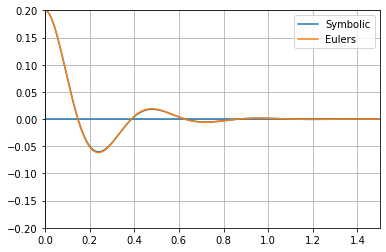

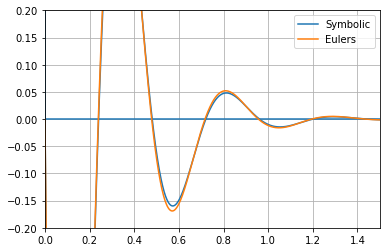

7.755545790291157


In [15]:
# Symbolic solution
# Create Symbols
t = sp.Symbol('t')
x_1s,x_2s = sp.symbols('x1,x2',cls=sp.Function)
# Define System
system = [sp.Eq(x_1s(t).diff(t),x_2s(t)),sp.Eq(x_2s(t).diff(t),-196*x_1s(t) -10*x_2s(t))]
# Print System of Equations!
print("System:")
display(system[0])
display(system[1])
# Lambda Expressions for Eulers
xp_1 = lambda x_1,x_2: x_2
xp_2 = lambda x_1,x_2: -196*x_1 - 10*x_2
differentials = [xp_1,xp_2]

# Set up the Steps
h =0.001
t_steps = np.arange(0,5,h)
initial_vals = [0.2,0]
# Use Eulers
x_1,x_2= eulersMethod(t_steps,differentials,initial_vals)
# Find the Symbolic Solution
solutions = dsolve_system(system,ics = {x_1s(0):initial_vals[0],x_2s(0):initial_vals[1]})
print("Actual Solutions")
display(solutions[0][0])
display(solutions[0][1])
# Of course lambdify joins the party
y_sol = sp.lambdify(t,solutions[0][0].rhs)
yp_sol = sp.lambdify(t,solutions[0][1].rhs)
# Plotting Here
#Comparison of both solutions:
plt.grid(True)
plt.axvline(x=0)
plt.axhline(y=0)
plt.xlim(0,1.5)
plt.ylim(-0.2,0.2)
# Symbolic
plt.plot(t_steps,y_sol(t_steps),label="Symbolic")
# Eulers2
plt.plot(t_steps,x_1,label="Eulers")
plt.legend()
plt.show()
plt.grid(True)
plt.axvline(x=0)
plt.axhline(y=0)
plt.xlim(0,1.5)
plt.ylim(-0.20,0.2)
#
plt.plot(t_steps,yp_sol(t_steps),label="Symbolic")
plt.plot(t_steps,x_2,label="Eulers")
plt.legend()
plt.show()
y = None
y = np.stack([y_sol(t_steps), yp_sol(t_steps)], axis = 1)
xt = None
xt = np.stack([x_1, x_2], axis = 1)
dist = np.sqrt(((y - xt)**2).sum(axis = 1)).sum()
print(dist)

The equation is my''+ ry' + ky = 0 
Then mu = r**2 - 4*m*k
When m = 1, r = 10, k = 196
mu = 10**2 - 4*196 < 0
Thus, it's underdamped.